Data from:
https://github.com/ubikuity/List-of-neighboring-states-for-each-US-state

In [1]:
import csv

In [2]:
with open("neighbors-states.csv") as csvfile:
    neighbours = csv.reader(csvfile)    
    neighbourpaircodes = [pair for pair in neighbours][1:]
    
print(neighbourpaircodes[0:10])

[['AK', 'WA'], ['AL', 'FL'], ['AL', 'GA'], ['AL', 'MS'], ['AL', 'TN'], ['AR', 'LA'], ['AR', 'MO'], ['AR', 'MS'], ['AR', 'OK'], ['AR', 'TN']]


In [3]:
with open("states.csv") as csvfile:
    s = csv.reader(csvfile)
    statenames = {state[0]: state[1] for state in list(s)[1:]}
print(statenames)

{'MD': 'Maryland', 'WV': 'West Virginia', 'AZ': 'Arizona', 'IL': 'Illinois', 'OH': 'Ohio', 'MO': 'Missouri', 'KS': 'Kansas', 'NJ': 'New Jersey', 'CO': 'Colorado', 'DC': 'District of Columbia', 'NM': 'New Mexico', 'NY': 'New York', 'MI': 'Michigan', 'KY': 'Kentucky', 'ME': 'Maine', 'WY': 'Wyoming', 'VT': 'Vermont', 'TX': 'Texas', 'CA': 'California', 'OR': 'Oregon', 'IN': 'Indiana', 'SC': 'South Carolina', 'NH': 'New Hampshire', 'NV': 'Nevada', 'AK': 'Alaska', 'MA': 'Massachusetts', 'GA': 'Georgia', 'MS': 'Mississippi', 'WA': 'Washington', 'PA': 'Pennsylvania', 'UT': 'Utah', 'NC': 'North Carolina', 'WI': 'Wisconsin', 'NE': 'Nebraska', 'FL': 'Florida', 'RI': 'Rhode Island', 'LA': 'Louisiana', 'VA': 'Virginia', 'MT': 'Montana', 'MN': 'Minnesota', 'SD': 'South Dakota', 'CT': 'Connecticut', 'OK': 'Oklahoma', 'DE': 'Delaware', 'HI': 'Hawaii', 'IA': 'Iowa', 'AL': 'Alabama', 'ND': 'North Dakota', 'ID': 'Idaho', 'AR': 'Arkansas', 'TN': 'Tennessee'}


In [4]:
neighbourpairs = [(statenames[i],statenames[j]) for i,j in neighbourpaircodes]
neighbourpairs[:9]

[('Alaska', 'Washington'),
 ('Alabama', 'Florida'),
 ('Alabama', 'Georgia'),
 ('Alabama', 'Mississippi'),
 ('Alabama', 'Tennessee'),
 ('Arkansas', 'Louisiana'),
 ('Arkansas', 'Missouri'),
 ('Arkansas', 'Mississippi'),
 ('Arkansas', 'Oklahoma')]

In [5]:
print(statenames)

{'MD': 'Maryland', 'WV': 'West Virginia', 'AZ': 'Arizona', 'IL': 'Illinois', 'OH': 'Ohio', 'MO': 'Missouri', 'KS': 'Kansas', 'NJ': 'New Jersey', 'CO': 'Colorado', 'DC': 'District of Columbia', 'NM': 'New Mexico', 'NY': 'New York', 'MI': 'Michigan', 'KY': 'Kentucky', 'ME': 'Maine', 'WY': 'Wyoming', 'VT': 'Vermont', 'TX': 'Texas', 'CA': 'California', 'OR': 'Oregon', 'IN': 'Indiana', 'SC': 'South Carolina', 'NH': 'New Hampshire', 'NV': 'Nevada', 'AK': 'Alaska', 'MA': 'Massachusetts', 'GA': 'Georgia', 'MS': 'Mississippi', 'WA': 'Washington', 'PA': 'Pennsylvania', 'UT': 'Utah', 'NC': 'North Carolina', 'WI': 'Wisconsin', 'NE': 'Nebraska', 'FL': 'Florida', 'RI': 'Rhode Island', 'LA': 'Louisiana', 'VA': 'Virginia', 'MT': 'Montana', 'MN': 'Minnesota', 'SD': 'South Dakota', 'CT': 'Connecticut', 'OK': 'Oklahoma', 'DE': 'Delaware', 'HI': 'Hawaii', 'IA': 'Iowa', 'AL': 'Alabama', 'ND': 'North Dakota', 'ID': 'Idaho', 'AR': 'Arkansas', 'TN': 'Tennessee'}


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
USA = nx.Graph()
USA.add_nodes_from(statenames.values(), freq=None)
USA.add_edges_from(neighbourpairs)

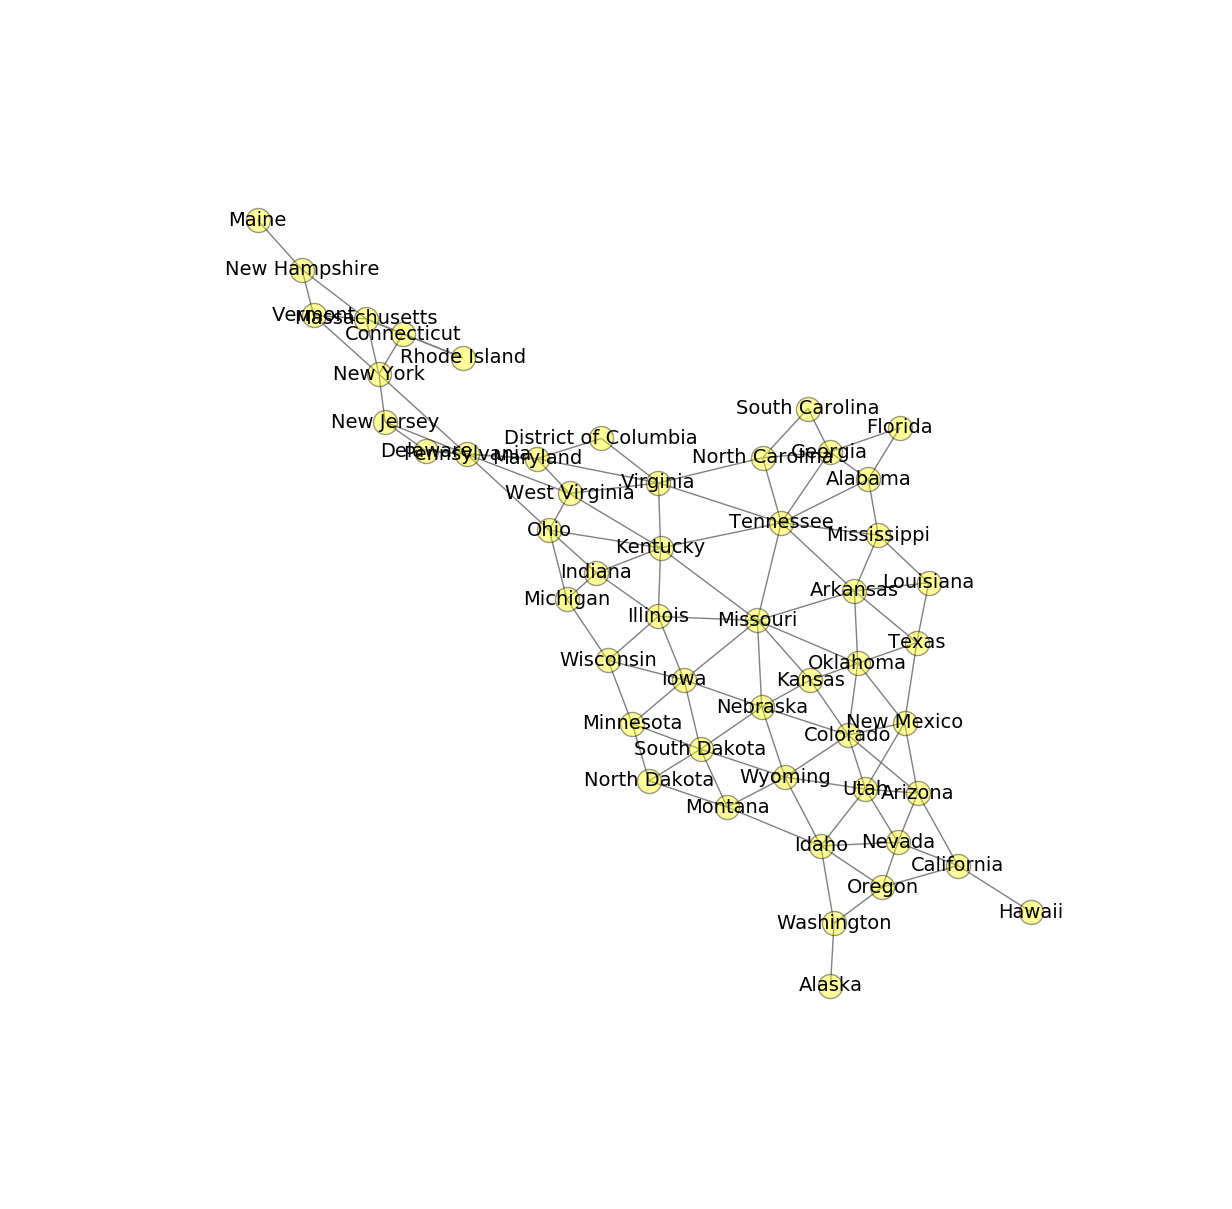

In [8]:
nx.spring_layout(USA)

plt.figure(figsize=(15,15))

pos = nx.spring_layout(USA)
nx.draw_networkx_nodes(USA, pos, 
                        nodelist=USA.nodes(),
                        node_color="yellow",
                        alpha=0.4)
nx.draw_networkx_labels(USA, pos, 
                        nodelist=USA.nodes(), 
                        font_size=14)
nx.draw_networkx_edges(USA, pos, 
                        edgelist=USA.edges(),
                        edge_color="grey")
plt.axis('off')
plt.show()

In [9]:
def pairCheck(graph, node1, node2):
    '''
    Returns True if both nodes don't share a radio frequency.
    '''
    # TODO Deal with None better.
    if graph.node[node1]['freq'] is not None and graph.node[node2]['freq'] is not None and graph.node[node1]['freq'] == graph.node[node2]['freq']:
        return False
    return True

In [10]:
print(pairCheck(USA, 'New Hampshire', 'Massachusetts'))
print(pairCheck(USA, 'Maine', 'New Hampshire'))

True
True


In [11]:
def neighborCheck(graph, node):
    '''
    Returns True if node doens't share a frequency with any of its neighbours.
    '''
    for neighbor in nx.all_neighbors(graph, node):
        if not pairCheck(graph, node, neighbor):
            return False
    return True

In [12]:
print(neighborCheck(USA, 'Maine'))
print(neighborCheck(USA, 'California'))

True
True


In [13]:
def graphCheck(graph):
    '''
    Returns True if all nodes don't share a frequency with any of their neighbours.
    '''
    for node in graph.nodes():
        if not neighborCheck(graph, node):
            return False
    return True

In [14]:
print(graphCheck(USA))

True


#### Algorithm
Go alphabetically through every area and try to assign it a frequency.
For each area, check if the bordering areas don't already have that frequency.
If any do have the same frequency, add 1 to the frequency.

In [15]:
for state in sorted(USA.nodes()):
    USA.node[state]['freq'] = 1
    while neighborCheck(USA, state) == False:
        USA.node[state]['freq'] += 1

In [16]:
graphCheck(USA)

True

In [17]:
nx.get_node_attributes(USA, 'freq')

{'Alabama': 1,
 'Alaska': 1,
 'Arizona': 1,
 'Arkansas': 1,
 'California': 2,
 'Colorado': 2,
 'Connecticut': 1,
 'Delaware': 1,
 'District of Columbia': 1,
 'Florida': 2,
 'Georgia': 3,
 'Hawaii': 1,
 'Idaho': 1,
 'Illinois': 1,
 'Indiana': 2,
 'Iowa': 2,
 'Kansas': 1,
 'Kentucky': 3,
 'Louisiana': 2,
 'Maine': 1,
 'Maryland': 2,
 'Massachusetts': 2,
 'Michigan': 1,
 'Minnesota': 1,
 'Mississippi': 3,
 'Missouri': 4,
 'Montana': 2,
 'Nebraska': 3,
 'Nevada': 3,
 'New Hampshire': 3,
 'New Jersey': 2,
 'New Mexico': 3,
 'New York': 3,
 'North Carolina': 1,
 'North Dakota': 3,
 'Ohio': 4,
 'Oklahoma': 5,
 'Oregon': 4,
 'Pennsylvania': 5,
 'Rhode Island': 3,
 'South Carolina': 2,
 'South Dakota': 4,
 'Tennessee': 2,
 'Texas': 4,
 'Utah': 4,
 'Vermont': 1,
 'Virginia': 4,
 'Washington': 2,
 'West Virginia': 1,
 'Wisconsin': 3,
 'Wyoming': 5}